In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.tabular import *

# Rossmann

## Data Preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this
    
```python
add_datepart(train, \"Date\", drop=False)
add_datepart(test, \"Date\", drop=False)
```

In [3]:
path = Path('data/rossmann/')
train_df = pd.read_pickle(path/'train_clean')

In [4]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [5]:
n = len(train_df); n

844338

## Experimenting with a sample

In [6]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars =  ['Store', 'DayOfWeek', 'PromoInterval']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

In [7]:
small_train_df.head()


,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
1558,447,4,NaN,1510.0,86,4704
1579,468,4,NaN,5260.0,86,9458
1620,509,4,"Jan,Apr,Jul,Oct",4740.0,56,6975
1896,785,4,"Feb,May,Aug,Nov",970.0,73,8803
1921,810,4,NaN,9640.0,52,6124


In [8]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
424231,66,5,"Jan,Apr,Jul,Oct",7660.0,55,5675
424562,397,5,"Feb,May,Aug,Nov",130.0,53,4681
424660,496,5,NaN,2780.0,86,6089
425846,573,4,"Jan,Apr,Jul,Oct",1190.0,67,3076
426366,1095,4,"Jan,Apr,Jul,Oct",690.0,69,3834


In [9]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [10]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
424231,NaN,5,"Jan,Apr,Jul,Oct",7660.0,55,5675
424562,397.0,5,"Feb,May,Aug,Nov",130.0,53,4681
424660,496.0,5,NaN,2780.0,86,6089
425846,573.0,4,"Jan,Apr,Jul,Oct",1190.0,67,3076
426366,1095.0,4,"Jan,Apr,Jul,Oct",690.0,69,3834


In [11]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [12]:
small_train_df['PromoInterval'].cat.codes[:5]

1558   -1
1579   -1
1620    1
1896    0
1921   -1
dtype: int8

In [13]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [14]:
small_test_df.CompetitionDistance.isna().sum()

0

In [15]:
small_train_df[small_train_df['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
2516,291,3,NaN,2610.0,55,8204,True
145573,622,2,NaN,2610.0,80,3329,True
310435,622,4,NaN,2610.0,71,4777,True


## Preparing full data set

In [16]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

In [17]:
len(train_df),len(test_df)

(844338, 41088)

In [18]:
procs=[FillMissing, Categorify, Normalize]

In [19]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [20]:
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var,'Date']].copy()

In [21]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [22]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

In [23]:
valid_idx = range(cut)

In [24]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [25]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .split_by_idx(valid_idx)
                   .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                   .databunch(device='cuda'))

In [26]:
type(data)

fastai.tabular.data.TabularDataBunch

In [27]:
doc(FloatList)

class FloatList [source] FloatList ( items : Iterator , log : bool = False , kwargs ) :: ItemList 
 
 ItemList suitable for storing the floats in items for regression. Will add a log if True 
 Show in docs

## Model

In [28]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [29]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

In [30]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [31]:
len(data.train_ds.cont_names)

16

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: cuDNN error: CUDNN_STATUS_EXECUTION_FAILED

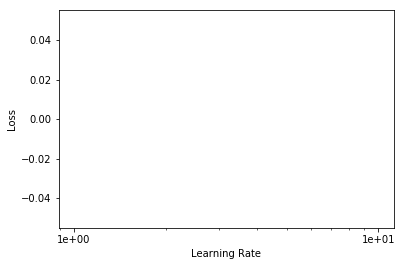

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe
1,0.021582,0.024815,0.143788
2,0.018175,0.018333,0.135718
3,0.017478,0.020365,0.127114
4,0.011431,0.014241,0.112108
5,0.009998,0.012251,0.105275


In [35]:
learn.save('1')

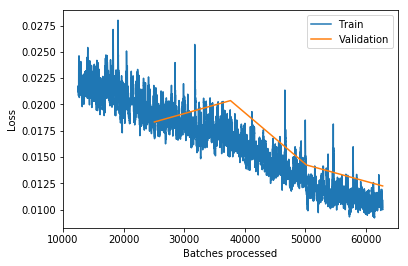

In [36]:
learn.recorder.plot_losses(last=-1)

In [37]:
learn.load('1');

In [38]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.012076,0.012704,0.108401
2,0.012056,0.014021,0.120199
3,0.010958,0.013901,0.116479
4,0.010919,0.014569,0.115136
5,0.009657,0.013588,0.112874


In [39]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.009807,0.013374,0.115377
2,0.010998,0.016034,0.138747
3,0.010686,0.018678,0.155635
4,0.009731,0.015620,0.126388
5,0.010169,0.015944,0.126348


(10th place in the competition was 0.108)